In [155]:
import lucem_illud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
import spacy
import scipy
from tqdm.auto import tqdm

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import gensim
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis

## 1. Load and Preprocess News Dataset - FOX, ABC, MSNBC

In [17]:
def load_preprocess_df(file_path, video_date, video_title):
    ''' 
    Load scrpaed comments csv into DataFrame, preprocess column information
    Arg:
        file_path (str): input csv file path of all comments and replies in a given video
        video_date (str): the publish date of this news video, different from comment's publish date
    '''

    df = pd.read_csv(file_path)
    df.rename(columns={'PublishedAt': 'Comment PublishedAt'}, inplace=True)
    df['Comment PublishedAt'] = pd.to_datetime(df['Comment PublishedAt']) # ensure entries are DataTime
    df['Comment PublishedAt'] = df['Comment PublishedAt'].dt.strftime('%Y-%m-%d') # ignore hour/minute/second
    df['Video PublishedAt'] = pd.Timestamp(video_date)
    df['Video Title'] = video_title
    
    return df

### 1.1 Fox News 2020

In [18]:
# 2020/3/9 "Tucker: We must remain calm but not complacent about the coronavirus"
fox3_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2003_comments.csv', '2020-03-09', 'Tucker: We must remain calm but not complacent about the coronavirus')
# 2020/4/10 "10 percent of US workforce now unemployed"
fox4_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2004_comments.csv', '2020-04-10', '10 percent of US workforce now unemployed')
# 2020/5/17 "Gutfeld: Where were the media warnings back when coronavirus pandemic started?"
fox5_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2005_comments.csv', '2020-05-17', 'Gutfeld: Where were the media warnings back when coronavirus pandemic started?')
# 2020/6/26 "Coronavirus cases are surging; Who's to blame?"
fox6_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2006_comments.csv', '2020-06-26', "Coronavirus cases are surging; Who's to blame?")
# 2020/7/27 "Dr. Fauci says he's 'cautiously optimistic' regarding coronavirus vaccine"
fox7_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2007_comments.csv', '2020-07-27', "Dr. Fauci says he's 'cautiously optimistic' regarding coronavirus vaccine")
# 2020/8/11 "Big 10 conference officially postpones 2020 football season"
fox8_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2008_comments.csv', '2020-08-11', 'Big 10 conference officially postpones 2020 football season')
# 2020/9/15 "Coronavirus whistleblower speaks out about possible COVID origin on 'Tucker'"
fox9_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2009_comments.csv', '2020-09-15', "Coronavirus whistleblower speaks out about possible COVID origin on 'Tucker'")
# 2020/10/11 "Trump says he no longer has coronavirus and is 'immune'"
fox10_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2010_comments.csv', '2020-10-11', "Trump says he no longer has coronavirus and is 'immune'")
# 2020/11/9 "Biden could propose national mask mandate as part of COVID-19 plan"
fox11_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2011_comments.csv', '2020-11-09', 'Biden could propose national mask mandate as part of COVID-19 plan')
# 2020/12/27 "Judge Jeanine: Congress's incompetence over COVID relief bill"
fox12_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2012_comments.csv', '2020-12-27', "Judge Jeanine: Congress's incompetence over COVID relief bill")


In [24]:
dfs = [fox3_df, fox4_df, fox5_df, fox6_df, fox7_df, fox8_df, fox9_df, fox10_df, fox11_df, fox12_df]
fox_df = pd.concat(dfs, ignore_index=True)

### 1.2 ABC News 2020

In [20]:
# 2020/01/27 "Race to contain deadly coronavirus with 5 confirmed US cases"
abc1_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2001_comments.csv', '2020-01-27', 'Race to contain deadly coronavirus with 5 confirmed US cases')
# 2020/02/24 "Italy struggles to contain new coronavirus outbreak"
abc2_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2002_comments.csv', '2020-02-24', 'Italy struggles to contain new coronavirus outbreak')
# 2020/03/24 "Lesson from South Korea on how to slow the COVID-19 spread"
abc3_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2003_comments.csv', '2020-03-24', 'Lesson from South Korea on how to slow the COVID-19 spread')
# 2020/04/06 "Queen Elizabeth address public amid coronavirus outbreak"
abc4_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2004_comments.csv', '2020-04-06', 'Queen Elizabeth address public amid coronavirus outbreak')
# 2020/05/27 "Facing cancer during COVID-19"
abc5_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2005_comments.csv', '2020-05-27', 'Facing cancer during COVID-19')
# 2020/06/25 "Latest updates on COVID-19: June 25, 2020"
abc6_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2006_comments.csv', '2020-06-25', 'Latest updates on COVID-19: June 25, 2020')
# 2020/07/02 "US coronavirus infections surge amid new warnings, closures | WNT"
abc7_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2007_comments.csv', '2020-07-02', 'US coronavirus infections surge amid new warnings, closures | WNT')
# 2020/08/24 "The new COVID-19 travel trend is a 'flexcation'"
abc8_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2008_comments.csv', '2020-08-24', "The new COVID-19 travel trend is a 'flexcation'")
# 2020/09/22 "COVID-19 crisis threatens children’s mental health"
abc9_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2009_comments.csv', '2020-09-22', "COVID-19 crisis threatens children's mental health")
# 2020/10/15 "Joe Biden pressed whether he would take a COVID-19 vaccine l ABC News Town Hall"
abc10_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2010_comments.csv', '2020-10-15', 'Joe Biden pressed whether he would take a COVID-19 vaccine l ABC News Town Hall')
# 2020/11/25 "Thanksgiving COVID-19 warning"
abc11_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2011_comments.csv', '2020-11-25', 'Thanksgiving COVID-19 warning')
# 2020/12/07 "Sean Penn’s COVID-19 testing mission"
abc12_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2012_comments.csv', '2020-12-07', "Sean Penn's COVID-19 testing mission")

In [26]:
dfs = [abc1_df, abc2_df, abc3_df, abc4_df, abc5_df, abc6_df, abc7_df, abc8_df, abc9_df, abc10_df, abc11_df, abc12_df]
abc_df = pd.concat(dfs, ignore_index=True)

### 1.3 MSNBC News 2020

In [22]:
# 2020/02/08 "13 Americans Infected With COVID-19 On Cruise Ship In Japan"
msnbc2_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2002_comments.csv', '2020-02-08', '13 Americans Infected With COVID-19 On Cruise Ship In Japan')
# 2020/03/16 "Historic: First Person to Test Covid Vaccine talks to Ari Melber in 2020"
msnbc3_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2003_comments.csv', '2020-03-16', 'Historic: First Person to Test Covid Vaccine talks to Ari Melber in 2020')
# 2020/03/31 "See Bill Gates’ Pandemic Warnings Before Covid: Ari Melber Breakdown"
msnbc4_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2004_comments.csv', '2020-03-31', "See Bill Gates' Pandemic Warnings Before Covid: Ari Melber Breakdown")
# 2020/05/25 "Global Carbon Emissions Drop By 17% Amid COVID-19 Pandemic | MTP Daily"
msnbc5_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2005_comments.csv', '2020-05-25', 'Global Carbon Emissions Drop By 17% Amid COVID-19 Pandemic | MTP Daily')
# 2020/06/26 "Gov. Abbott’s Steps 'Fall Short' Of What Texas Needs Amid Rising COVID-19 Cases"
msnbc6_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2006_comments.csv', '2020-06-26', "Gov. Abbott's Steps 'Fall Short' Of What Texas Needs Amid Rising COVID-19 Cases")
# 2020/07/08 "Pathologist Shares Findings From Autopsies Of COVID-19 Patients | MTP Daily"
msnbc7_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2007_comments.csv', '2020-07-08', 'Pathologist Shares Findings From Autopsies Of COVID-19 Patients | MTP Daily')
# 2020/08/27 "Joy Reid On Trump Downplaying COVID-19: There's No Politician I'd Die For"
msnbc8_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2008_comments.csv', '2020-08-27', "Joy Reid On Trump Downplaying COVID-19: There's No Politician I'd Die For")
# 2020/09/02 "Fauci: U.S. Must Shrink Daily COVID Case Baseline To '10,000 Or Less' | Andrea Mitchell"
msnbc9_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2009_comments.csv', '2020-09-02', "Fauci: U.S. Must Shrink Daily COVID Case Baseline To '10,000 Or Less' | Andrea Mitchell")
# 2020/10/06 "Trump Returns To WH, Says To Not Be Afraid Of Coronavirus | Morning Joe"
msnbc10_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2010_comments.csv', '2020-10-06', 'Trump Returns To WH, Says To Not Be Afraid Of Coronavirus | Morning Joe')
# 2020/11/29 "Doctor on COVID: ‘Going Back To Normal Will Prolong This War’"
msnbc11_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2011_comments.csv', '2020-11-29', "Doctor on COVID: 'Going Back To Normal Will Prolong This War'")
# 2020/12/18 "FDA Grants Emergency Authorization To Moderna's Covid-19 Vaccine | All In"
msnbc12_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2012_comments.csv', '2020-12-18', "FDA Grants Emergency Authorization To Moderna's Covid-19 Vaccine | All In")

In [28]:
dfs = [msnbc2_df, msnbc3_df, msnbc4_df, msnbc5_df, msnbc6_df, msnbc7_df, msnbc8_df, msnbc9_df, msnbc10_df, msnbc11_df, msnbc12_df]
msnbc_df = pd.concat(dfs, ignore_index=True)

## 2. Preprocess Comments and Video Titles

In [33]:
nlp = spacy.load("en_core_web_sm")

def word_tokenize(comment):
    ''' 
    Tokenize each comment, exclude punctuation and empty strings/spaces
    Arg:
        comment (str): A single comment to be tokenized
    '''

    tokenized = []
    doc = nlp(comment)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

### 2.1 Tokenize the Comments

In [36]:
# Wrap pd.Series.apply with tqdm to display a progress bar
tqdm.pandas(desc="Tokenizing Comments")
fox_df['Tokenized Comment'] = fox_df['Comment'].progress_apply(word_tokenize)

Tokenizing Comments:   0%|          | 0/47693 [00:00<?, ?it/s]

In [38]:
tqdm.pandas(desc="Tokenizing Comments")
abc_df['Tokenized Comment'] = abc_df['Comment'].progress_apply(word_tokenize)

Tokenizing Comments:   0%|          | 0/11412 [00:00<?, ?it/s]

In [40]:
tqdm.pandas(desc="Tokenizing Comments")
msnbc_df['Tokenized Comment'] = msnbc_df['Comment'].progress_apply(word_tokenize)

Tokenizing Comments:   0%|          | 0/30508 [00:00<?, ?it/s]

### 2.2 Normalize: lowercase, remove stop words, remove punctuation, and lemmatize

Using the functions from the lucem_illud package provided by the course to do further preprocess

In [43]:
tqdm.pandas(desc="Normalizing Comments")

fox_df['Normalized Comment'] = fox_df['Tokenized Comment'].progress_apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
abc_df['Normalized Comment'] = abc_df['Tokenized Comment'].progress_apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
msnbc_df['Normalized Comment'] = msnbc_df['Tokenized Comment'].progress_apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])

Normalizing Comments:   0%|          | 0/47693 [00:00<?, ?it/s]

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Normalizing Comments:   0%|          | 0/11412 [00:00<?, ?it/s]

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Normalizing Comments:   0%|          | 0/30508 [00:00<?, ?it/s]

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [52]:
fox_df['Normalized Comment'] = fox_df['Normalized Comment'].apply(lambda x: [item for item in x if item])
abc_df['Normalized Comment'] = abc_df['Normalized Comment'].apply(lambda x: [item for item in x if item])
msnbc_df['Normalized Comment'] = msnbc_df['Normalized Comment'].apply(lambda x: [item for item in x if item])

In [129]:
fox_df['Normalized Comment'] = fox_df['Normalized Comment'].apply(lambda x: [item for sublist in x for item in sublist])
abc_df['Normalized Comment'] = abc_df['Normalized Comment'].apply(lambda x: [item for sublist in x for item in sublist])
msnbc_df['Normalized Comment'] = msnbc_df['Normalized Comment'].apply(lambda x: [item for sublist in x for item in sublist])

## 3. Clustering

### 3.1 Vectorize Tokens

Use TfidfVectorizer: 
- YouTube comments are likely to include a lot of common language and potentially irrelevant words. TF-IDF can help to highlight the unique terms that might better represent the content of each comment
- TF-IDF naturally accounts for the length of the comments, adjusting the word counts by the length of each comment, which can be quite variable in online discussions

I want to compare themes, topics, or patterns across the corpuses (FOX News, ABC News, and MSNBC), so use one CountVectorizer to ensure that the feature space is consistent across all your data

In [94]:
# Initialize the vectorizer
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.9, max_features=10000, min_df=5, stop_words='english', norm='l2')

# Combine tokens from all comments to train the vectorizer, I want to see the whole picture for now
combined_df = pd.concat([fox_df, abc_df, msnbc_df], axis=0, ignore_index=True)

# Train the vectorizer on the combined corpus
newsTFVects = tfidf_vectorizer.fit_transform(combined_df['Comment'])

In [95]:
combined_df['Comment']

0                                  Pathetic fear mongering
1                                                Prophetic
2        Hey! First comment of 2023! Is it anniversary ...
3        It&#39;s kind of surreal to watch this now giv...
4        I know I am 2 years late, but when did Tucker ...
                               ...                        
89608                       Hey Joe, what&#39;s your name?
89609                                Tar and feather trump
89610    @@meeker456 you must be the results of being r...
89611    You mean Netanyahu and trumps presidency is ov...
89612                                 @@jx1668<br>That too
Name: Comment, Length: 89613, dtype: object

In [114]:
newsTFVects.shape

(89613, 10000)

In [115]:
# check for tf-idf for each word in each text
list(zip(tfidf_vectorizer.vocabulary_.keys(), newsTFVects.data))[:20]

[('pathetic', 0.6340751491880924),
 ('fear', 0.4871728300192083),
 ('mongering', 0.60050923296247),
 ('prophetic', 1.0),
 ('hey', 0.29921095135189835),
 ('comment', 0.3277581533610444),
 ('day', 0.46857588972471187),
 ('china', 0.5350925094420197),
 ('virus', 0.5451238771180242),
 ('39', 0.43811781039641345),
 ('kind', 0.5591806518874618),
 ('watch', 0.4129737492689413),
 ('given', 0.5301890322365752),
 ('tucker', 0.20909819530297943),
 ('know', 0.43375823781709844),
 ('years', 0.4056117271971112),
 ('late', 0.30417969817590557),
 ('did', 0.4712229205612838),
 ('trust', 0.34533309573124793),
 ('science', 0.28571243239743155)]

### 3.2 Flat Clustering with K-Means

#### 3.2.1 Selecting Cluster Number - Elbow Method

Cluster analysis groups observations while PCA groups variables rather than observations

In [70]:
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    ''' 
    Plot the Sum of Squared Errors (SSE) for a range of cluster sizes and look 
    for the "elbow" where the SSE begins to level off
    '''

    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


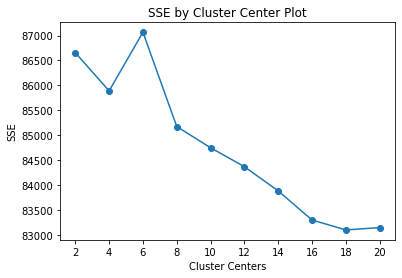

In [104]:
find_optimal_clusters(newsTFVects, 20)

Based on the above graph, we could use 16 as our cluster number

#### 3.2.2 Selecting Cluster Number - Silhouette Method

In [108]:
numClusters = 16
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km.fit(newsTFVects)

KMeans(n_clusters=16)

In [107]:
km.labels_

array([13, 13, 11, ..., 13, 13,  7], dtype=int32)

In [110]:
terms = tfidf_vectorizer.get_feature_names_out()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 assumptions
 quot
 intelligence
 sign
 information
 making
 experiment
 expert
 experiments
 experimenting


Cluster 1:
 prosperity
 peak
 br
 martenson
 chris
 ago
 months
 showing
 feb
 videos


Cluster 2:
 got
 39
 people
 just
 br
 trump
 quot
 virus
 vaccine
 don


Cluster 3:
 did
 know
 39
 china
 trump
 virus
 gates
 obama
 just
 say


Cluster 4:
 suppress
 single
 second
 live
 come
 china
 people
 experimentation
 experts
 expertise


Cluster 5:
 br
 39
 opinion
 matter
 facts
 execute
 technocracy
 doesn
 wil
 transition


Cluster 6:
 na
 la
 html
 nation
 story
 far
 br
 principle
 www
 derek


Cluster 7:
 speeches
 interesting
 long
 isn
 ago
 knew
 gates
 virus
 exploit
 exploding


Cluster 8:
 trump
 president
 2020
 39
 biden
 br
 quot
 obama
 2015
 donald


Cluster 9:
 39
 br
 quot
 people
 virus
 china
 just
 like
 don
 know


Cluster 10:
 crazy
 39
 people
 nancy
 like
 know
 just
 quot
 lol
 man


Cluster 11:
 devils
 wicked
 gates


Let's decrease the number of clusters 

In [123]:
numClusters = 10
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km.fit(newsTFVects)

KMeans(n_clusters=10)

In [124]:
terms = tfidf_vectorizer.get_feature_names_out()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 fauci
 dr
 gates
 lab
 wuhan
 39
 funded
 virus
 research
 br


Cluster 1:
 figure
 39
 people
 trump
 just
 gates
 virus
 trying
 way
 doesn


Cluster 2:
 robert
 confused
 br
 totally
 man
 said
 39
 experimental
 expertise
 expert


Cluster 3:
 newsmax
 fox
 news
 oan
 tv
 switch
 unsubscribe
 bye
 faux
 watch


Cluster 4:
 quot
 39
 br
 trump
 people
 virus
 just
 gates
 like
 china


Cluster 5:
 mask
 sane
 infecting
 prevent
 virus
 case
 protect
 39
 don
 people


Cluster 6:
 trump
 br
 gates
 people
 president
 like
 just
 https
 god
 biden


Cluster 7:
 news
 fox
 fake
 39
 trump
 cnn
 media
 president
 br
 just


Cluster 8:
 39
 don
 people
 trump
 br
 just
 know
 didn
 like
 doesn


Cluster 9:
 virus
 china
 39
 br
 world
 people
 trump
 gates
 corona
 chinese




<b> Cluter 0: Dr. Fauci and Lab Theory </b>
- Keywords such as "fauci," "dr," "lab," "wuhan," and "virus" suggest discussions centered around Dr. Anthony Fauci, possibly in relation to COVID-19 origins and the lab leak theory. 
- In interviews on January 21, January 26, and February 17, Fauci commented on COVID-19. He said that at the time of the interviews ("right now"), COVID-19 was not a "major threat" to the American public, with the risk to the American public being "low", but that it was "an evolving situation", and that "public health officials need to take COVID-19 very seriously". In the latter interview, Fauci said that COVID-19 could become a "global pandemic which would then have significant implications for" the United States.

<b> Cluster 1: Political Figures and Skepticism </b>
- Involve discussions about political figures ("trump," "gates") and skepticism or criticism regarding their actions or statements about the virus. 
- The term "people" and phrases like "trying", "doesn" suggest debates about leadership and public response to the pandemic.

<b> Cluster 2: Confusion and Expertise </b>
- Terms like "robert," "confused," "totally," "expertise," and "experimental" indicate conversations possibly about scientific figures or discussions on experimental treatments for COVID-19. This cluster may reflect confusion or debate over scientific opinions and experimental approaches.

<b> Cluster 3: Media and Viewer Preferences </b>
- With references to various news outlets ("newsmax," "fox news," "oan") and actions like "switch," "unsubscribe," "watch," this cluster likely captures discussions about media preferences, distrust, or endorsements of specific news channels by the viewers.

<b> Cluster 4: Political Discourse </b>
- The presence of "quot" (quotes), "trump," and "china" alongside "virus" suggests political discourse possibly related to the handling of the pandemic, with a focus on China and former President Trump. 

<b> Cluster 5: Health Precautions </b>
- Focused on health-related terms like "mask," "infecting," "prevent," "protect," and "case," this cluster seems to be centered around discussions on health precautions and the effectiveness of masks in preventing virus spread.

<b> Cluster 6: Political and Ideological Discussions </b>
- Featuring "trump," "gates," "president," "god," and "biden," this cluster indicates a mix of political discussions, possibly with a stronger ideological or emotional tone, reflecting discussion related to 2020 presidential election.

<b> Cluster 7: Media Criticism </b>
- Terms like "news," "fox," "fake," "cnn," and "media" suggest a focus on critiquing media outlets, with discussions likely revolving around accusations of bias, fake news, and comparisons between different networks.

<b> Cluster 8: General Discourse </b>
- This cluster appears to capture more general or varied discussions, with terms indicating disagreement or discussion ("don," "know," "didn," "doesn"). It might include various topics beyond a single theme.

<b> Cluster 9: Virus Origin and Global Impact </b>
- With "virus," "china," "world," "corona," and "chinese," discussions in this cluster likely focus on the origin of the virus, its global impact, and possibly the geopolitical implications related to China.

Based on the top terms per cluster, 10 seems to perform better than 15 in clustering closely related yet distinguisheable terms

### 3.3 Visualize the Clusters

In [126]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(newsTFVects.toarray())
reduced_data = pca.transform(newsTFVects.toarray())

In [127]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) 
words = [terms[i] for i in keyword_ids]
x = components[:,keyword_ids][0,:] 
y = components[:,keyword_ids][1,:]

In [79]:
def plotSilhouette(n_clusters, X, pca):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples of cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st principal component")
    ax2.set_ylabel("Feature space for the 2nd principal component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

Silhouette Analysis (Left Plot):
- Assess the quality of the clustering
- Each bar represents a cluster (from 1 to 10), and the length of the bar represents the silhouette coefficient of the samples within that cluster
- The silhouette coefficient values range from -1 to 1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters


Cluster Visualization (Right Plot):
- Show data points colored according to the cluster they belong to, as determined by the KMeans algorithm
- First two principal components:a form of dimensionality reduction that transforms the data into a new coordinate system where the greatest variance by any projection of the data comes to lie on the first coordinate and the second greatest variance on the second coordinate, and so on

For n_clusters = 10 The average silhouette_score is : 0.7173718327521487


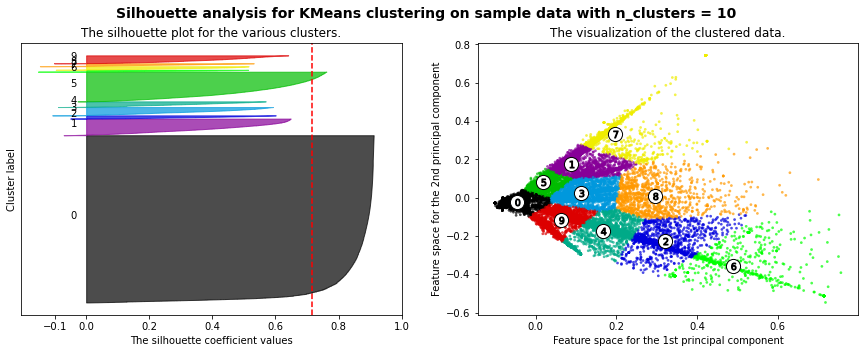

In [128]:
plotSilhouette(n_clusters=10, X=reduced_data, pca=pca)

Silhouette Analysis Plot
- Some clusters, such as cluster 0 and 5 have higher silhouette coefficient values, indicating better separation. Note that cluster 0 focus on Dr. Fauci and lab theory which is a specific topic, and cluster 5 focuses on health precautions with key terms like "mask," "infecting," "prevent," "protect," and "case," which is also about a specific topic compare to other clusters.
- There are clusters with coefficients closer to 0, and even below 0, suggesting some overlap or misclassification. Based on the top terms, we do see some overlapping between cluster 4, 6, and 8

Cluster Separation: 
- The scatter plot displays the clusters formed in the reduced two-dimensional space after PCA.
- The scatter plot shows that while some clusters are distinct and separate, others are overlapping significantly, especially around the edges. This could be due to the high dimensionality of the original data which, when reduced to two dimensions, loses some of the separation information.

## 4 Topic Modeling
### 4.1 LDA

In [141]:
combined_df['tokenized_text'] = combined_df['Comment'].progress_apply(lambda x: lucem_illud.word_tokenize(x))
combined_df['normalized_tokens'] = combined_df['tokenized_text'].progress_apply(lambda x: lucem_illud.normalizeTokens(x))

Normalizing Comments:   0%|          | 0/89613 [00:00<?, ?it/s]

Normalizing Comments:   0%|          | 0/89613 [00:00<?, ?it/s]

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [150]:
# tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.9, max_features=10000, min_df=5, stop_words='english', norm='l2')
# combined_df = pd.concat([fox_df, abc_df, msnbc_df], axis=0, ignore_index=True)
# newsTFVects = tfidf_vectorizer.fit_transform(combined_df['Comment'])

lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(newsTFVects)

LatentDirichletAllocation(random_state=0)

In [151]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx+1}:")
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("\n")

print_topics(lda, tfidf_vectorizer, n_top_words=10)

Topic #1:
gates judge evil 39 love wow man jeanine population like


Topic #2:
president god thank trump bless woman brave obama 39 gates


Topic #3:
39 people br quot don china trump world masks just


Topic #4:
39 mask good trump gates money people wear don like


Topic #5:
china 39 virus ccp lol war did know world people


Topic #6:
https com href youtube www br watch youtu http amp


Topic #7:
virus quot br 39 gates https vaccine lab coronavirus pandemic


Topic #8:
39 br exactly yes quot people virus china amen trump


Topic #9:
news fox fake 39 br media quot trump just cnn


Topic #10:
trump 2020 biden 39 joe vote president said quot br




LDA topic modeling analysis:
- Topic 1: Criticism and Reactions
- Topic 2: Political support and emotional support
- Topic 3: Skeptism against mask or China
- Topic 4: Health precautions opinions and Trump
- Topic 5: China and speculation
- Topic 6: YouTube and links
- Topic 7: Virus control, lab, and conspiracy
- Topic 8: General confirmation on Trump or China
- Topic 9: Media critique on fake news
- Topic 10: Political campaign and presidential election


### 4.2 Gensim 

In [158]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

combined_df['reduced_tokens'] = combined_df['normalized_tokens'].apply(lambda x: dropMissing(x, tfidf_vectorizer.vocabulary_.keys()))

In [160]:
dictionary = gensim.corpora.Dictionary(combined_df['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in combined_df['reduced_tokens']]

gensim.corpora.MmCorpus.serialize('comment.mm', corpus)
senmm = gensim.corpora.MmCorpus('comment.mm')

In [161]:
senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [162]:
ldaDF = pd.DataFrame({
        'comment' : combined_df['Comment'],
        'topics' : [senlda[dictionary.doc2bow(l)] for l in combined_df['reduced_tokens']]
    })

In [164]:
topicsProbDict = {i : [0] * len(ldaDF) for i in range(senlda.num_topics)}

for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

for topicNum in range(senlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,comment,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,Prophetic,"[(0, 0.08295761), (1, 0.06832692), (2, 0.08971...",0.082958,0.068327,0.089712,0.080611,0.049200,0.043411,0.065039,0.070575,0.392243,0.057924
101,"Well, that&#39;s why you&#39;re only half... h...","[(0, 0.063400544), (1, 0.051610645), (2, 0.069...",0.063401,0.051611,0.069514,0.060932,0.036965,0.032549,0.543452,0.053124,0.044588,0.043865
201,Joe Rogan is also amazing and he has over 3 mi...,"[(0, 0.031027874), (1, 0.027594103), (2, 0.035...",0.031028,0.027594,0.035134,0.172264,0.479471,0.158533,0.024317,0.026396,0.023599,0.021664
301,"It didnt disappear, it is still a major proble...","[(0, 0.010475598), (2, 0.010861926), (5, 0.048...",0.010476,0.000000,0.010862,0.000000,0.000000,0.048509,0.533219,0.238910,0.127896,0.000000
401,Probably the best speech I&#39;ve ever heard s...,"[(0, 0.019718247), (1, 0.01592975), (2, 0.4492...",0.019718,0.015930,0.449266,0.018998,0.204286,0.010010,0.015312,0.239311,0.013735,0.013434
...,...,...,...,...,...,...,...,...,...,...,...,...
89201,Like the Pied Piper the President blew his whi...,"[(0, 0.14116034), (1, 0.1445503), (2, 0.383522...",0.141160,0.144550,0.383523,0.027481,0.016389,0.014462,0.021672,0.023762,0.207699,0.019302
89301,What a clown,"[(0, 0.082937576), (1, 0.06831041), (2, 0.4231...",0.082938,0.068310,0.423156,0.080591,0.049188,0.043401,0.065424,0.070558,0.058523,0.057910
89401,https://youtu.be/abOlWzx_h9A The Black Conser...,"[(0, 0.25578266), (1, 0.12075046), (2, 0.13545...",0.255783,0.120750,0.135453,0.130579,0.013396,0.011824,0.017696,0.282779,0.015972,0.015768
89501,🤦🏼‍♀️ medication top colors are as different a...,"[(0, 0.03576145), (1, 0.029249849), (2, 0.0387...",0.035761,0.029250,0.038777,0.034659,0.021077,0.018583,0.027867,0.743798,0.025115,0.025113


In [166]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['comment']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.049785,0.040961,0.053779,0.048408,0.270716,0.026023,0.038993,0.401506,0.035091,0.034738
1,0.082958,0.068327,0.089712,0.080611,0.049200,0.043411,0.065039,0.070575,0.392243,0.057924
2,0.037470,0.181146,0.039228,0.036014,0.021103,0.018591,0.302506,0.030746,0.308035,0.025161
3,0.042419,0.035110,0.045479,0.041673,0.024584,0.116427,0.032501,0.603209,0.029546,0.029052
4,0.031469,0.225308,0.222328,0.030910,0.193516,0.016290,0.025014,0.027472,0.205771,0.021922
5,0.050106,0.040963,0.210639,0.048797,0.029497,0.026029,0.039828,0.042330,0.035125,0.476686
6,0.027847,0.022769,0.161816,0.026919,0.016388,0.014462,0.021719,0.274328,0.414361,0.019392
7,0.033758,0.026010,0.033990,0.032494,0.018492,0.198314,0.207334,0.405601,0.022207,0.021800
8,0.028043,0.022747,0.807573,0.026837,0.016380,0.014452,0.021665,0.023496,0.019510,0.019296
9,0.285483,0.027111,0.090529,0.225927,0.000000,0.000000,0.045152,0.205877,0.041504,0.072153


In [177]:
topicsDict = {}
for topicNum in range(senlda.num_topics):
    topicWords = [w for w, p in senlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,people,gates,trump,people,god,news,virus,br,like,virus
1,money,man,president,sick,lol,msnbc,vaccine,video,covid,world
2,world,guy,obama,covid,mask,fake,people,covid,warning,control
3,america,vaccines,pandemic,like,stay,media,coronavirus,people,nt,population
4,country,talk,years,tell,jesus,guys,afraid,death,virus,corona
5,care,love,said,joe,life,propaganda,event,fear,people,new
6,need,like,vote,thank,safe,believe,flu,great,looks,depopulation
7,evil,truth,white,wow,wear,watch,pandemic,states,masks,ready
8,want,wants,house,hospital,bless,pandemics,year,virus,think,exactly
9,time,conspiracy,knew,know,breathing,question,died,lies,look,agenda


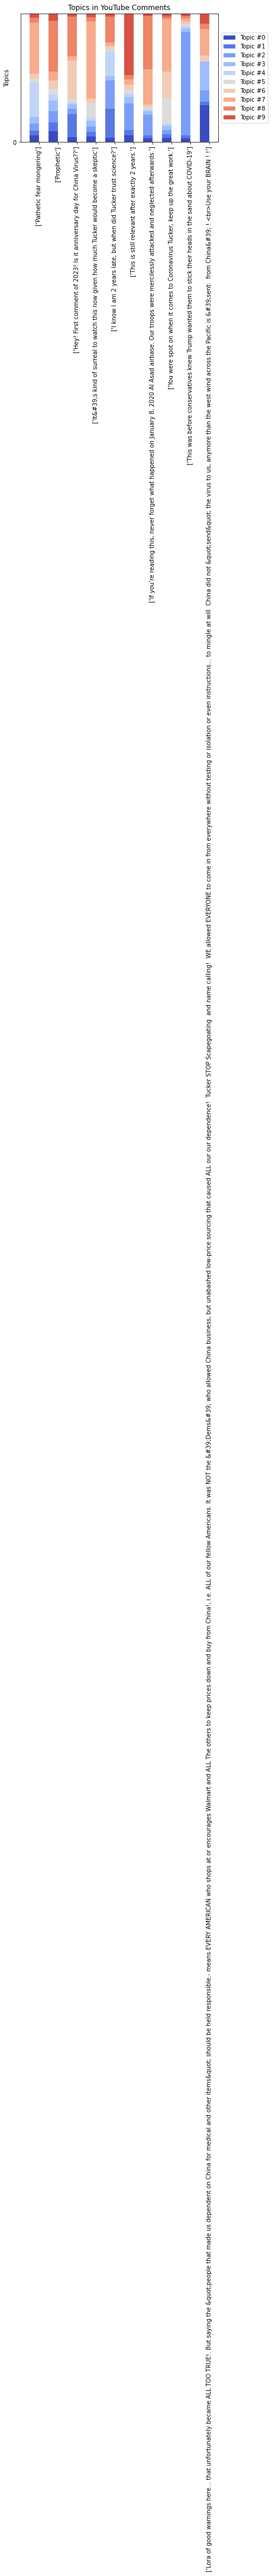

In [172]:
N = 10
ind = np.arange(N)
K = senlda.num_topics 
ind = np.arange(N) 
width = 0.5 
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)


plt.ylim((0, 1)) 
plt.ylabel('Topics')

plt.title('Topics in YouTube Comments')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

In [174]:
senlda.show_topic(0)

[('people', 0.032604124),
 ('money', 0.021130964),
 ('world', 0.019335512),
 ('america', 0.01764691),
 ('country', 0.013649189),
 ('care', 0.0130149145),
 ('need', 0.012014521),
 ('evil', 0.011358618),
 ('want', 0.009780952),
 ('time', 0.008841254)]

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_16531/3329667577.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


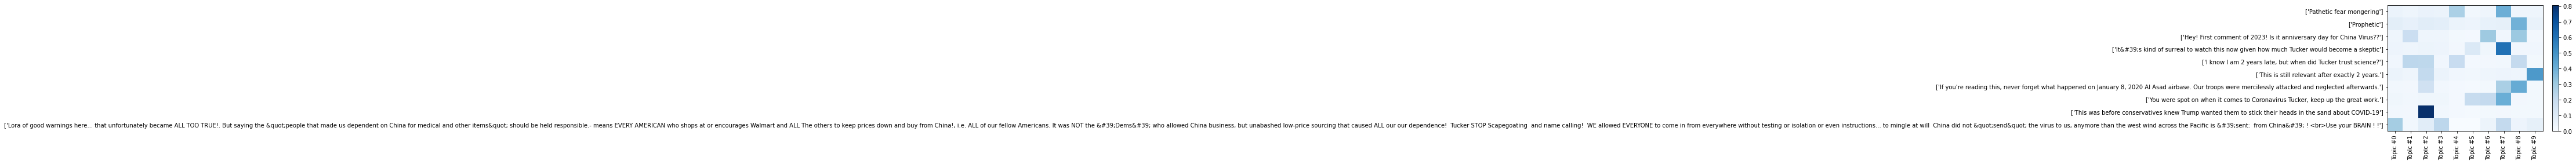

In [176]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames)
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels)

plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Blues')
plt.tight_layout()
plt.show()